# Data set 
    
      Data is taken from the Kaggle to study the customer behavior in Black Friday at a retail store

# Importing all neccessary library files


In [1]:
import pandas as pd
import numpy as np # linear algebra

import seaborn as sns
import matplotlib as mlp
%matplotlib inline
import matplotlib.pyplot as plt




### Reading csv file

In [2]:
df=pd.read_csv('BlackFriday.csv')

### Analysing Data

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [7]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [8]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Filling the missing values.
    We only have missing values in Product_Category_1 and Product_Category_2 columns. If we drop the rows it loose the other data. If we look at the columns, the value says number of products under category 2 and category 3 are ordered by particular user. So missing values can be consider as zero items ordered.

In [9]:
df.fillna(value=0,inplace=True)

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [11]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [14]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)

In [15]:
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [16]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

### Analyzing data
    

##### Who is more likely to spend more in a black Friday sale (in Gender)? 

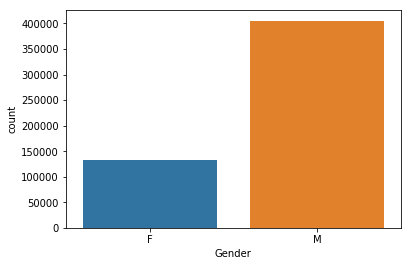

In [17]:
sns.countplot(df['Gender'])

##### From the above we can conclude that Males are the most likely to spend on Black Friday Sale

##### Which age groups are commonly looking for purchase items in a black Friday sale? 

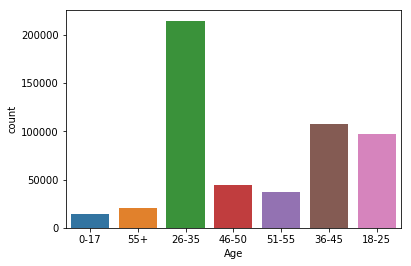

In [18]:
sns.countplot(df['Age'])

##### From the above we can say that Age group between 26 to 35 are most who spend their money on Black Friday

##### Under the Age group of 26-35  who is most likey to spend Men or Women ?

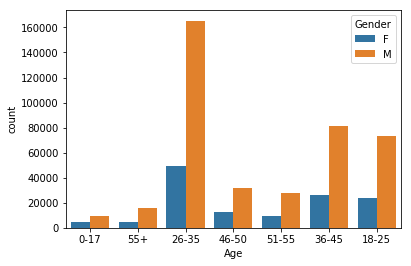

In [19]:
sns.countplot(df['Age'],hue=df['Gender'])

##### From the above we can conclude that Males are the most likely to spend on Black Friday Sale

##### Are they new to the City or not ?

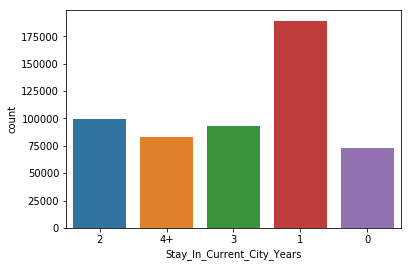

In [20]:
sns.countplot(df['Stay_In_Current_City_Years'])

#### Base on the data most of them are new to the city, but we can see that others are also spending money almost 50% of new commers.

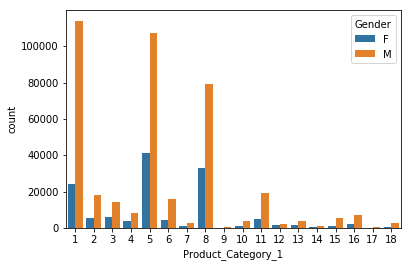

In [21]:
sns.countplot(df['Product_Category_1'],hue=df['Gender'])

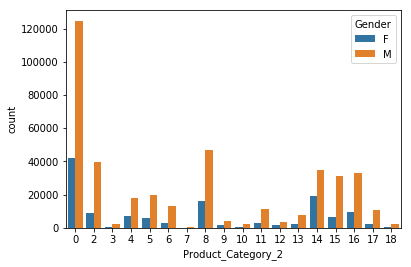

In [22]:
sns.countplot(df['Product_Category_2'],hue=df['Gender'])

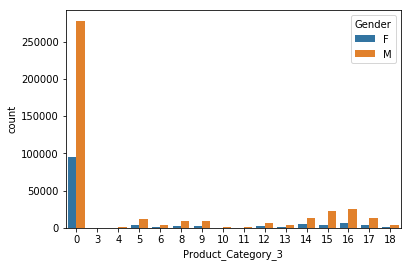

In [23]:
sns.countplot(df['Product_Category_3'],hue=df['Gender'])

### Getting correlation

In [24]:
corr_matrix = df.corr()

corr_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.005389,0.021104,0.000129,-0.314125,0.038395,0.284120,1.000000


In [26]:
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase              1.000000
Product_Category_3    0.284120
Product_Category_2    0.038395
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_1   -0.314125
Name: Purchase, dtype: float64

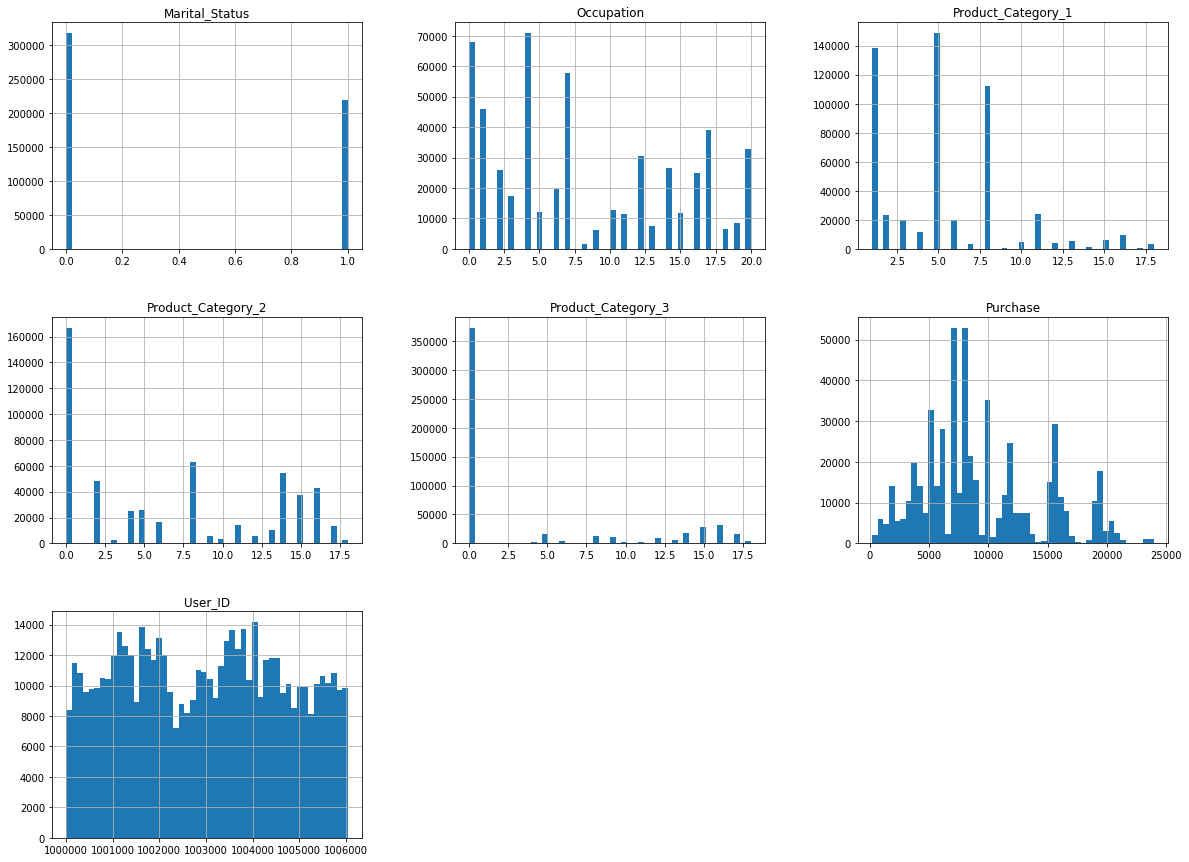

In [27]:

df.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
df['Combined_G_M']=df['Gender'] + "_" + df['Marital_Status'].astype(str)

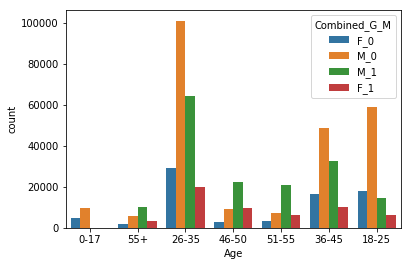

In [29]:
sns.countplot(df['Age'],hue=df['Combined_G_M'])

In [30]:
df.drop(columns=['User_ID','Product_ID'],inplace=True)

In [31]:
df=pd.get_dummies(df)

### Splitting Data into Test and Train 
### 20% data for Test and 80% data for Train

In [32]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [33]:

test_set.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Combined_G_M_F_0,Combined_G_M_F_1,Combined_G_M_M_0,Combined_G_M_M_1
287383,17,0,1,2,15,8058,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
130087,14,0,1,16,0,19297,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
104368,0,1,8,0,0,6121,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
370791,4,0,8,16,0,8130,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
121991,0,0,5,14,0,8676,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [34]:
test_set.shape

(107516, 27)

In [35]:
train_set.shape

(430061, 27)

In [36]:
corr_matrix = train_set.corr()

corr_matrix

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Combined_G_M_F_0,Combined_G_M_F_1,Combined_G_M_M_0,Combined_G_M_M_1
Occupation,1.000000,0.023696,-0.007505,0.007539,0.012332,0.020586,-0.116895,0.116895,0.018224,-0.096366,...,0.036051,-0.025431,-0.003359,-0.011808,0.024887,0.015096,-0.111906,-0.036738,0.055327,0.049455
Marital_Status,0.023696,1.000000,0.021649,0.000614,-0.006113,-0.000931,0.010277,-0.010277,-0.139471,-0.189389,...,0.033554,-0.010487,0.027492,-0.004765,-0.013056,-0.007596,-0.339851,0.406414,-0.749604,0.798868
Product_Category_1,-0.007505,0.021649,1.000000,-0.039945,-0.390545,-0.315476,0.045589,-0.045589,-0.017156,-0.037714,...,-0.022984,0.005473,0.005838,-0.008634,-0.009581,0.006421,0.026843,0.033698,-0.040298,0.000903
Product_Category_2,0.007539,0.000614,-0.039945,1.000000,0.088970,0.037932,0.001530,-0.001530,-0.010122,-0.011842,...,0.019952,-0.003074,0.001204,0.001660,-0.001821,0.001441,0.001215,0.000770,-0.001462,0.000148
Product_Category_3,0.012332,-0.006113,-0.390545,0.088970,1.000000,0.283730,-0.036786,0.036786,-0.000220,0.004560,...,0.034529,-0.002247,-0.003436,0.004611,0.002485,-0.000892,-0.024177,-0.024289,0.023060,0.009471
Purchase,0.020586,-0.000931,-0.315476,0.037932,0.283730,1.000000,-0.060218,0.060218,-0.010515,-0.008131,...,0.067854,-0.006885,-0.002177,0.005797,0.001139,0.001967,-0.047012,-0.031188,0.034006,0.019539
Gender_F,-0.116895,0.010277,0.045589,0.001530,-0.036786,-0.060218,1.000000,-1.000000,0.036275,-0.000499,...,-0.000911,-0.016572,0.031119,-0.008319,0.011780,-0.028819,0.715672,0.592894,-0.513835,-0.379358
Gender_M,0.116895,-0.010277,-0.045589,-0.001530,0.036786,0.060218,-1.000000,1.000000,-0.036275,0.000499,...,0.000911,0.016572,-0.031119,0.008319,-0.011780,0.028819,-0.715672,-0.592894,0.513835,0.379358
Age_0-17,0.018224,-0.139471,-0.017156,-0.010122,-0.000220,-0.010515,0.036275,-0.036275,1.000000,-0.078840,...,0.059826,0.007615,-0.008012,0.018706,0.003139,-0.019991,0.093778,-0.056683,0.071908,-0.111419
Age_18-25,-0.096366,-0.189389,-0.037714,-0.011842,0.004560,-0.008131,-0.000499,0.000499,-0.078840,1.000000,...,-0.022273,0.043563,-0.028843,0.009622,-0.022810,0.010450,0.052979,-0.061790,0.149980,-0.161290


In [37]:
corr_matrix["Purchase"]

Occupation                       0.020586
Marital_Status                  -0.000931
Product_Category_1              -0.315476
Product_Category_2               0.037932
Product_Category_3               0.283730
Purchase                         1.000000
Gender_F                        -0.060218
Gender_M                         0.060218
Age_0-17                        -0.010515
Age_18-25                       -0.008131
Age_26-35                       -0.002660
Age_36-45                        0.005437
Age_46-50                       -0.003342
Age_51-55                        0.015672
Age_55+                          0.004612
City_Category_A                 -0.045135
City_Category_B                 -0.023038
City_Category_C                  0.067854
Stay_In_Current_City_Years_0    -0.006885
Stay_In_Current_City_Years_1    -0.002177
Stay_In_Current_City_Years_2     0.005797
Stay_In_Current_City_Years_3     0.001139
Stay_In_Current_City_Years_4+    0.001967
Combined_G_M_F_0                -0

In [38]:
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase                         1.000000
Product_Category_3               0.283730
City_Category_C                  0.067854
Gender_M                         0.060218
Product_Category_2               0.037932
Combined_G_M_M_0                 0.034006
Occupation                       0.020586
Combined_G_M_M_1                 0.019539
Age_51-55                        0.015672
Stay_In_Current_City_Years_2     0.005797
Age_36-45                        0.005437
Age_55+                          0.004612
Stay_In_Current_City_Years_4+    0.001967
Stay_In_Current_City_Years_3     0.001139
Marital_Status                  -0.000931
Stay_In_Current_City_Years_1    -0.002177
Age_26-35                       -0.002660
Age_46-50                       -0.003342
Stay_In_Current_City_Years_0    -0.006885
Age_18-25                       -0.008131
Age_0-17                        -0.010515
City_Category_B                 -0.023038
Combined_G_M_F_1                -0.031188
City_Category_A                 -0

In [39]:

X_train = train_set.drop("Purchase", axis=1) # drop labels for training set
y_train = train_set["Purchase"].copy()

### Selecting the model

In [40]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4628.860170843433

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [43]:
train_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2236.895447759055

In [44]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [1]:
def display_scores(scores):
    """"
    Prints the parameter values, Mean of parameter values and Standard deviation of parameter values.
    Here the parameter value is scores
    Args: 
        Cross validation scores
    Returns:
        nothing
        ....
    """"
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

SyntaxError: EOL while scanning string literal (<ipython-input-1-b66bd98cccfc>, line 10)

In [46]:
# Now compute the same score for Linear Regression

lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4646.81309627 4583.98383267 4643.39784918 4589.92840477 4617.64162405
 4622.04748062 4624.58415255 4648.51245304 4655.159447   4658.01835169]
Mean: 4629.008669183671
Standard deviation: 24.862855322531843


In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
# Calculate RMSE in Random Forest model

train_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2339.735708423163

In [49]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3129.91385374 3079.77472002 3104.65146265 3097.60723872 3117.35336381
 3112.26290762 3110.40935826 3103.44954927 3085.03495199 3098.79301797]
Mean: 3103.9250424046395
Standard deviation: 14.051278105957428


### Tuning the model

In [50]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [51]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [52]:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3503.7696540190086 {'max_features': 2, 'n_estimators': 3}
3347.31495549597 {'max_features': 2, 'n_estimators': 10}
3290.179853969534 {'max_features': 2, 'n_estimators': 30}
3407.0344820673417 {'max_features': 4, 'n_estimators': 3}
3229.1943246090855 {'max_features': 4, 'n_estimators': 10}
3184.4746057214693 {'max_features': 4, 'n_estimators': 30}
3293.6690117303124 {'max_features': 6, 'n_estimators': 3}
3163.058960819297 {'max_features': 6, 'n_estimators': 10}
3112.5192390210623 {'max_features': 6, 'n_estimators': 30}
3253.8455047792772 {'max_features': 8, 'n_estimators': 3}
3126.0579266832747 {'max_features': 8, 'n_estimators': 10}
3085.292598948231 {'max_features': 8, 'n_estimators': 30}
3497.4243498401943 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3424.8243766435903 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3456.0666903269675 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3383.928373786367 {'bootstrap': False, 'max_features': 3, 'n_estim

### Prediction on Test Data

In [54]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

X_test = test_set.drop("Purchase", axis=1)
y_test = test_set["Purchase"].copy()


final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
final_rmse

3069.4347607530985

In [56]:
X_test[:5]

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Combined_G_M_F_0,Combined_G_M_F_1,Combined_G_M_M_0,Combined_G_M_M_1
287383,17,0,1,2,15,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
130087,14,0,1,16,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
104368,0,1,8,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
370791,4,0,8,16,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
121991,0,0,5,14,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [57]:
y_test[:5]

287383     8058
130087    19297
104368     6121
370791     8130
121991     8676
Name: Purchase, dtype: int64

In [58]:
final_predictions[:5]

array([12880.94478076, 15811.53144954,  6837.95602865,  8066.57716931,
        5655.11692795])